# Using the fft to compute correlation

Below I use aircraft measurments of $\theta$ and wvel taken at 25 Hz.  I compute the 
autocorrelation using numpy.correlate and numpy.fft and show they are identical, as we'd expect

In [1]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import urllib
import os
filelist=['aircraft.npz']
data_download=True
if data_download:
    for the_file in filelist:
        url='http://clouds.eos.ubc.ca/~phil/docs/atsc500/data/{}'.format(the_file)
        urllib.request.urlretrieve(url,the_file)
print("download {}: size is {:6.2g} Mbytes".format(the_file,os.path.getsize(the_file)*1.e-6))

download aircraft.npz: size is   0.73 Mbytes


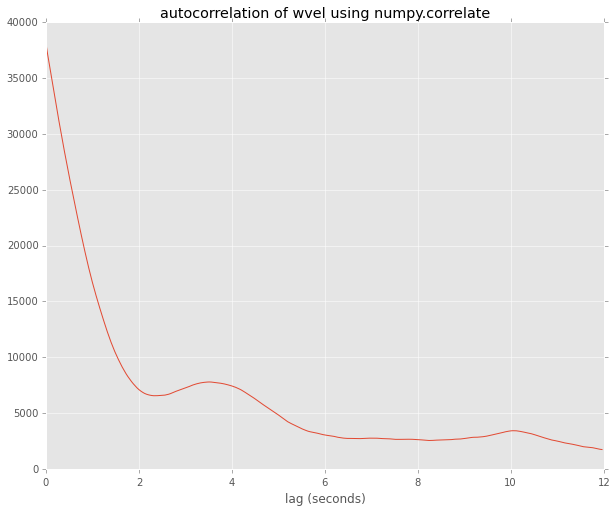

In [2]:
#http://stackoverflow.com/questions/643699/how-can-i-use-numpy-correlate-to-do-autocorrelation
import numpy as np
%matplotlib inline
data = np.load('aircraft.npz')
wvel=data['wvel'] - data['wvel'].mean()
theta=data['theta'] - data['theta'].mean()
autocorr = np.correlate(wvel,wvel,mode='full')
auto_data = autocorr[wvel.size:]
ticks=np.arange(0,wvel.size)
ticks=ticks/25.
fig,ax = plt.subplots(1,1,figsize=(10,8))
ax.set(xlabel='lag (seconds)',title='autocorrelation of wvel using numpy.correlate')
out=ax.plot(ticks[:300],auto_data[:300])


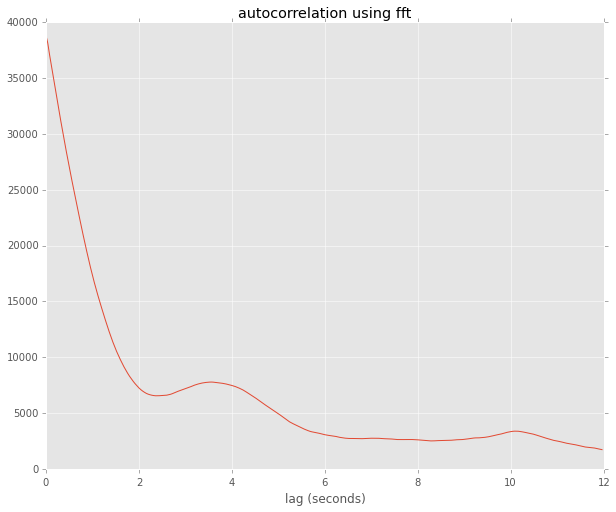

In [3]:
import numpy.fft as fft
the_fft = fft.fft(wvel)
auto_fft = the_fft*np.conj(the_fft)
auto_fft = np.real(fft.ifft(auto_fft))

fig,ax = plt.subplots(1,1,figsize=(10,8))
ax.plot(ticks[:300],auto_fft[:300])
out=ax.set(xlabel='lag (seconds)',title='autocorrelation using fft')